C:\Users\user\AppData\Local\Temp\ipykernel_40196\1780669991.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(error))
C:\Users\user\AppData\Local\Temp\ipykernel_40196\1780669991.py:238: RuntimeWarning: overflow encountered in exp
  self.a_vector = 1 / (1 + np.exp(-self.z_vector))


43.54418699663228
31.82152888414855
28.78336397010009
25.66205682791699
20.479169441904382
30.49354885430212
21.01221229727614
44.941197817373514
28.641012118099056
25.387999779053764
43.7127052757361
35.511152816060594
24.113481672666243
40.67781961642045
18.952230508235345
19.348707568061553
23.423637619268586
28.465850172522796
21.844682002225873
20.458953196680316
21.9501338531885
18.908384179729758
40.437774465729355
19.607475867467826
31.001711974131407
31.324026738443276
19.321147721641008
42.31233097780071
19.19625113863674
33.03490678302766
41.4448243237117
33.13088497840326
30.539273249054464
33.16832969165179
27.804075192633384
32.4943029209593
26.52150971225077
28.615237381211994
41.22241312580209
44.20898526287709
22.813405102618205
18.895503302206087
33.04241941650901
18.871205307113023
35.69573617934949
20.64403670743608
33.910701772824
42.97292667853372
42.07024510916128
39.712039252555414
20.23675655736996
38.30656534770973
35.8224666593356
20.468119286186084
35.997897

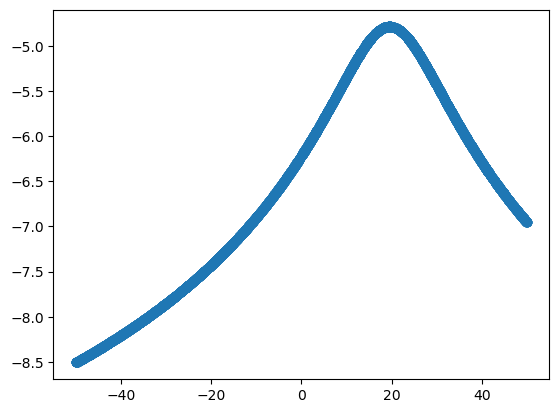

In [1]:

import pandas as pd
import numpy as np
import math
df = pd.read_csv("hw2_data.csv")

import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])


class MLP_network:
    def __init__(self, node_config: list, activation_config: list):
        # node_config에는 Layer에 몇 개의 노드를 가질 것인지 나타낸다. 
        # Ex) [1, 2, 3, 3, 3, 1]
        # 5층에 각 층별로 1개, 2개, 3개, ... 1개씩 존재한다.
        self.node_configuration = node_config
        self.activation_config = activation_config
        # 각 노드에 하나씩 존재하도록 한다. 
        # 별도로 Bias는 Backpropagation 연산에는 포함되지 않도록 하며
        # 별도의 업데이트 과정을 거치도록 한다. 
        # 처음 학습을 시작할 때 별도로 bias_list를 초기화하는 과정을 거치도록 한다. 
        self.bias_list = list()

        # 3차원 큐브의 형태로 구성하고 있는 weight 정보
        # 한 Layer가 다른 layer로 전사될 때 하나의 Matrix가 사용된다. 
        # Bias는 별도로 업데이트 된다. 
        # 처음 학습을 시작할 때 별도로 weight_list를 초기화하는 과정을 거치도록 한다. 
        self.weight_list = list()

        # layer를 담도록 하는 list 객체
        # MLP 선언과 동시에 layer 정보가 담겨야 한다. 
        self.layers = []

        self.stack_delta_list = []

        return

        # 현재로써는 모든 노드가 identity를 activation 함수로 가지도록 한다. 
    # 추가적으로 activation 함수 또한 수정할 수 있도록 바꿔야 한다. 
    # 입력층에 값을 할당하는 것은 set_value 함수에서 하도록 한다.
    # Weight를 일괄적으로 initialization하는데 초점을 둔다. 
    # 별도로 Weight 외에, Bias 또한 일괄적으로 Update한다. 
    # 해당 함수를 사용해서, Matrix를 새로 초기화한다.
    def _configure_network(self):
        for index in range(len(self.node_configuration)):
            node_info = self.node_configuration[index]
            activation_info = self.activation_config[index]
            self.layers.append(Layer(node_info,activation_info))
        self.layers[0].is_first = True
        self.layers[-1].is_final = True
        for i in range(len(self.node_configuration)-1):
            # MLP에 초기 무직위 weight 정보 구성
            self.weight_list.append(np.random.rand(self.node_configuration[i+1], self.node_configuration[i]))
            self.bias_list.append(np.random.rand(self.node_configuration[i+1]))
            self.stack_delta_list.append(np.zeros((self.node_configuration[i+1], self.node_configuration[i])))
    def _refresh_stack_delta_list(self):
        for i in range(len(self.node_configuration)-1):
            self.stack_delta_list[i] = np.zeros((self.node_configuration[i+1], self.node_configuration[i]))
    # MLP 순전파 연산만 담당하도록 한다.
    # 입력 값을 넣는 과정은 set_value 함수가 담당하도록 한다. 
    # 여기에서는 단순하게 a 값을 반환하도록 한다.
    # 가중치 업데이트를 위한 a 값 획득은 training 단계에서 해결하도록 한다. 
    # 전파 과정은 다음 식으로 표현될 수 있다.
    # z = Wa + b
    # 순서가 다르다는 것에 유의하자.
    def forward_propagation(self):
        for i in range(len(self.node_configuration)-1):

            # 1차원 벡터 형식
            tempInput : np.ndarray = self.layers[i].a_vector

            # 2차원 행렬 형식
            tempWeight : np.ndarray = self.weight_list[i]

            # 1차원 벡터 형식 : 최종적으로 z_vector에 입력된다. 
            tempOutput : np.ndarray = np.zeros((1,self.node_configuration[i]))

            # 합산 z 구하는 과정
            tempOutput : np.ndarray = tempWeight @ tempInput



            # 노드 간 행렬곱 -> z 값 저장
            # Throw 발생으로 추정됨
            self.layers[i+1].z_vector = tempOutput + self.bias_list[i]
            #  -+> Activation Function 적용 호출
            self.layers[i+1].activation_function()
        return

        # backpropagation 가중치 update를 바라보고 알고리즘을 구성하는 것이 좋을 것 같음
    def backpropagation(self, y):

        # L 번째 Layer -+> L-1 번째 weight, Layer 
        self.layers[-1].delta_vector = self.layers[-1].a_vector - y

        # TO DO : 역전파 알고리즘에 적절하게 Range 메서드 인자 값 수정할 것
        for i in range(len(self.node_configuration)-2, 0, -1):
            # i - 1 Weight matrix와 연산해야 함
            # 전치된 행렬 얻음
            temp_weight_holder = self.weight_list[i].transpose()

            # delta 정보 전파
            self.layers[i].delta_vector = temp_weight_holder @ self.layers[i+1].delta_vector # 별도로 pairwise 연산 추가해야함

            # wrong code for updating
            #self.layers[i].batch_delta_vector += self.layers[i].delta_vector

            # this is actually right code
            temp = np.outer(self.layers[i+1].delta_vector, self.layers[i].a_vector)
            self.stack_delta_list[i] = self.stack_delta_list[i] + temp
        return






































    # batch iteration은 단순히 순전파, 역전파를 진행하고, 누적 delta 값을 하는데 초점을 맞춘다. 
    # batch 내의 데이터를 가지고 노는 역할
    def batch_iteration(self, data_set : pd.DataFrame, batch_size : int,learning_rate : float, bias_lambda : float):
        # 1회 Batch 실행할 때, 반드시 가중치 Matrix를 다시 초기화해야 한다.
        self._configure_network()

        for batch in np.array_split(data_set.sample(frac = 1), len(data_set) // batch_size):

            # iterate for every batch entity element 
            for index, row in batch.iterrows():
                self.set_value(row['x'])
                self.forward_propagation()

                #get error
                # 내 코드는 하나의 에러에 대해서만 Back-propagation을 수행하려고 함
                error = 0.5 * (self.layers[-1].a_vector - row['y'])**2
                print(float(error))

                self.backpropagation(row['y'])

            # batch iteration end

            self.weight_update(batch_size, learning_rate, bias_lambda)
            #self.bias_update(batch_size, learning_rate)
            # soft reset for next batch
            for i in self.layers:
                i.delta_vector = None
                i.batch_delta_vector = 0
            self._refresh_stack_delta_list()
        return

        # batch_iteration 완료 후, 각 layer 별로 delta 값에 따라서 weight와 Bias를 Update한다
    def weight_update(self, batch_size : int,learning_rate : float, bias_lambda: float ):

        # 각 Layer를 역방향으로 탐색해오면서 누적 노드 Delta 값과 activation value를 곱한 Update Factor를 
        # learning Rate와 함께 곱하면서 weight와 Bias를 구한다.

        for i in range(len(self.weight_list)):
            D = (1/batch_size)*(self.stack_delta_list[i] + bias_lambda * self.weight_list[i])
            self.weight_list[i] = self.weight_list[i] - learning_rate * D

    # 해당 함수에서는 최종적으로 조정된 Parameter를 가지고 예측했을 때의 오차를 나타낸다.
    def validation(self, validation_data_set):
        total_error = 0
        total_samples = len(validation_data_set)
        for index, row in validation_data_set.iterrows():
            self.set_value(row['x'])
            self.forward_propagation()
            error = (self.layers[-1].a_vector - row['y']) ** 2
            total_error += error

        # cost function도 함수로 제공하면 좋을 듯
        mse = total_error / total_samples
        return mse

    # 단순히 입력층에 대해서만 값을 결정시킨다.
    # 출력층의 label은 별도로 Backpropagation과 validation, prediction에서 manual하게 다루게 한다.
    def set_value(self,x):
        self.layers[0].a_vector = np.array([x])

    # bias_list는 i + 1번째 layer가 i번째에 있음
    # 
    def bias_update(self,batch_size, learning_rate : float):
        for i in range(len(self.bias_list)):
            self.bias_list[i] = self.bias_list[i] - learning_rate * (1/batch_size) * self.layers[i+1].batch_delta_vector
    def just_prediction(self, input_data):
        self.set_value(input_data)
        self.forward_propagation()
        return self.layers[-1].a_vector[0]

class Layer:
    def __init__(self, num_nodes, diff: str, is_first:bool = False, is_final:bool=False):
        self.num_node = num_nodes
        self.z_vector : np.ndarray = None
        self.a_vector : np.ndarray = None
        self.delta_vector : np.ndarray = None
        self.batch_delta_vector = 0
        self._diff_info = diff
        self.is_final = False
        self.is_first = False

    def activation_function(self):
        if self._diff_info == 'sigmoid':
            self._sigmoid()
        elif self._diff_info == 'identity':
            self._identity()

    def _sigmoid(self):
        self.a_vector = 1 / (1 + np.exp(-self.z_vector))

    def _identity(self):
        self.a_vector = self.z_vector
    def clear_batch_delta_vector(self):
        self.batch_delta_vector = None

mlp = MLP_network([1,3,5,4,1], ['identity','identity','sigmoid','sigmoid','identity'])

base_data_set = pd.read_csv('hw2_data.csv')

training_data_set = base_data_set.sample(frac=1).reset_index(drop=True)

spliter = int(len(df) * 0.8)

training_data_set = base_data_set[:spliter]
validation_data_set = base_data_set[spliter:]

mlp.batch_iteration(training_data_set, 100,0.1,0)
print(mlp.validation(validation_data_set))
'''
x_values = np.linspace(df['x'].min(), df['x'].max(), len(df))  # 입력 데이터 생성
predicted_values = list()
print(mlp.just_prediction(20))
'''
x_values = np.linspace(df['x'].min(), df['x'].max(), len(df))  # 입력 데이터 생성
predicted_values = list()
for i in range(len(x_values)):
    temp = mlp.just_prediction(x_values[i])
    predicted_values.append(temp)
    print(temp)
result = pd.DataFrame ( {'x':x_values, 'y': predicted_values})


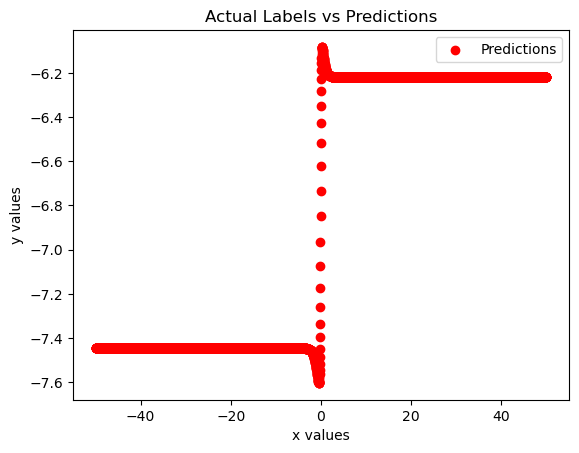

In [2]:
plt.scatter(x_values, predicted_values, label='Predictions', color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Actual Labels vs Predictions')
plt.legend()
plt.show()